In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Loading the Data

In [8]:
df = pd.read_csv('/data.csv')

In [9]:
df.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


Checking Shape of DataFrame

In [24]:
df.shape

(2217, 3)

Handling  Missing Values 


In [11]:
df.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

In [13]:
df = df.dropna()

In [14]:
df.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

Handling Outliers in Data

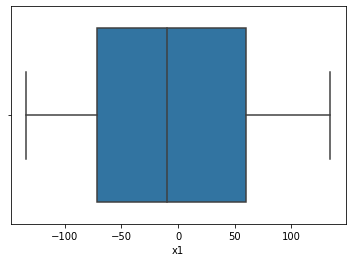

In [15]:
sns.boxplot(data = df ,x='x1')

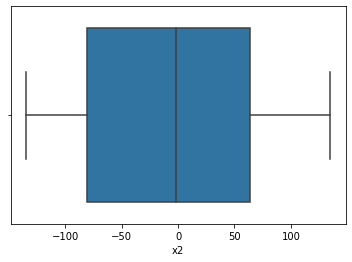

In [23]:
sns.boxplot(data=df,x='x2')

In [25]:
df.describe()

,x1,x2,y
count,2217.000000,2217.000000,2217.000000
mean,-4.855645,-6.730568,0.442490
std,74.917277,79.843938,0.496794
min,-134.369160,-134.876132,0.000000
25%,-71.626564,-80.519315,0.000000
50%,-9.922271,-1.827336,0.000000
75%,59.633331,63.622498,1.000000
max,134.508687,134.929748,1.000000


In [21]:
Q1=df['x2'].quantile(0.25)
Q3=df['x2'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR

-80.25965764
63.904483264999996
144.164140905


In [22]:
df = df[df['x2'] < Upper_Whisker]

Train_Test_Split

In [26]:
data = df.drop('y',axis = 1)
target = df['y']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.25, random_state = 0)

Hyperparameter Tuning For Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV

In [35]:
tuned_parameters = [{'C':[1, 2, 3, 4, 5], 'penalty':['l2','l1','l3']}]
score = ['accuracy','precision','recall']                    
for i in score:                   
    clf = RandomizedSearchCV( LogisticRegression(), tuned_parameters, scoring='{}'.format(i))
    clf.fit(X_train, y_train)
    print("Best parameters set found on train set:")
    print('for {}'.format(i))
    print(clf.best_params_)
    print(clf.best_estimator_)
    print(clf.score(X_test, y_test))

Best parameters set found on train set:
for accuracy
{'penalty': 'l2', 'C': 1}
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
0.7513513513513513
Best parameters set found on train set:
for precision
{'penalty': 'l2', 'C': 5}
LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
1.0
Best parameters set found on train set:
for recall
{'penalty': 'l2', 'C': 2}
LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
                  

Traning The Model

In [37]:
classifier = LogisticRegression(penalty='l2',C=5)
classifier.fit(X_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
y_test_pred = classifier.predict(X_test)

In [40]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_test_pred))
print(metrics.precision_score(y_test,y_test_pred))
print(metrics.roc_auc_score(y_test,y_test_pred))
print(metrics.f1_score(y_test,y_test_pred))
print(metrics.recall_score(y_test,y_test_pred))

0.7513513513513513
1.0
0.7183673469387755
0.6079545454545455
0.43673469387755104


HyperParameter Tuning with SVM

In [41]:
from sklearn.svm import SVC

In [44]:
classifier_2 = SVC(kernel='linear')  
classifier_2.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [46]:
y_test_pred_2 = classifier_2.predict(X_test)

In [47]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_test_pred_2))
print(metrics.precision_score(y_test,y_test_pred_2))
print(metrics.roc_auc_score(y_test,y_test_pred_2))
print(metrics.f1_score(y_test,y_test_pred_2))
print(metrics.recall_score(y_test,y_test_pred_2))

0.745945945945946
1.0
0.7122448979591837
0.5959885386819485
0.42448979591836733


In [48]:
classifier_3 = SVC(kernel='rbf')  
classifier_3.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [49]:
y_test_pred_3 = classifier_3.predict(X_test)

In [50]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_test_pred_3))
print(metrics.precision_score(y_test,y_test_pred_3))
print(metrics.roc_auc_score(y_test,y_test_pred_3))
print(metrics.f1_score(y_test,y_test_pred_3))
print(metrics.recall_score(y_test,y_test_pred_3))

0.9567567567567568
0.9437751004016064
0.9570111915734035
0.9514170040485829
0.9591836734693877


HyperParamter Tuning With Decison Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier 


In [52]:
tuned_parameters = [{'max_depth':[1,2,3,4,5]}]
em = ['accuracy','precision','recall']

for i in em:
    clf2 = RandomizedSearchCV(DecisionTreeClassifier(), tuned_parameters, scoring='{}'.format(i))
    clf2.fit(X_train, y_train)
    print('for {}'.format(i))
    print("Best parameters set found on train set:")
    print(clf2.best_params_)
    print(clf2.best_estimator_)
    print(clf2.score(X_test, y_test))
    print()

for accuracy
Best parameters set found on train set:
{'max_depth': 5}
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
0.9297297297297298

for precision
Best parameters set found on train set:
{'max_depth': 4}
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter

In [53]:
classifier_4 = DecisionTreeClassifier(max_depth = 2)
classifier_4.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [54]:
y_test_pred_4 = classifier_4.predict(X_test)

In [55]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_test_pred_4))
print(metrics.precision_score(y_test,y_test_pred_4))
print(metrics.roc_auc_score(y_test,y_test_pred_4))
print(metrics.f1_score(y_test,y_test_pred_4))
print(metrics.recall_score(y_test,y_test_pred_4))

0.7153153153153153
0.6118251928020566
0.7421658986175116
0.750788643533123
0.9714285714285714


HyperParameter Tuning With KNN

In [56]:
from sklearn.neighbors import KNeighborsClassifier
tuned_parameters = [{'n_neighbors':[1, 2, 3, 4, 5], 'p':[1, 2, 3]}]

clf3 = RandomizedSearchCV(KNeighborsClassifier(), tuned_parameters, scoring='accuracy')
clf3.fit(X_train, y_train)

print("Best parameters set found on train set:")
print(clf3.best_params_)
print(clf3.best_estimator_)
print()

print(clf3.score(X_test, y_test))

Best parameters set found on train set:
{'p': 3, 'n_neighbors': 5}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=3,
                     weights='uniform')

0.9513513513513514


In [59]:
classifier_5= KNeighborsClassifier(n_neighbors=5,p=3)
classifier_5.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=3,
                     weights='uniform')

In [60]:
y_test_pred_5 = classifier_5.predict(X_test)

In [61]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_test_pred_5))
print(metrics.precision_score(y_test,y_test_pred_5))
print(metrics.roc_auc_score(y_test,y_test_pred_5))
print(metrics.f1_score(y_test,y_test_pred_5))
print(metrics.recall_score(y_test,y_test_pred_5))

0.9513513513513514
0.943089430894309
0.9508887425938117
0.945010183299389
0.9469387755102041


Data Visualization


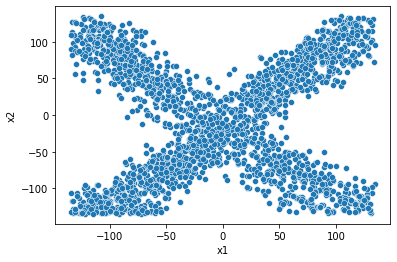

In [62]:
sns.scatterplot(data = df , x = 'x1',y='x2')



1.   From the above scatterplot we can say that our data is in non linear form.
2.   By training all the model SVM rbf kernel is giving more accuracy than the other Algorithms.
SVM Transforms the Non linear data into higher dimensions using Kernel Trick and separates the Data using HyperPlane and Classfies the Input Variables Perfectly




